<a href="https://colab.research.google.com/github/strongway/tutorial_data_science/blob/master/Data_analysis_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analysis and visualization with Pandas and Pingouin

**Msense Lab Tutorial, Strongway, 15. Nov 2021**




Many of us know how to use R with tidyverse method, which use the tidy-format table (Row-wise: Trials, Column-wise: variable), and pipe lines to concatenate analyses together. Here I will show you how to use chain rules in Python Pandas to do analyses in a similar way. 

In [1]:
!pip install pingouin

     |████████████████████████████████| 182 kB 27.2 MB/s 
     |████████████████████████████████| 38.2 MB 25 kB/s 
     |████████████████████████████████| 9.8 MB 74.9 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.0-py3-none-any.whl size=193661 sha256=20e43f90653f056f75e6208542fad55d9d2146bb4dea3538a01e3b85ada514e4
  Stored in directory: /root/.cache/pip/wheels/14/46/f9/cedd81d68d2515c24bbbd000d5b347e4fe092ccc4b568f7f70
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=2e198424bced327f23d6e9e964fe0290956455b7857fd26d2ebc69006eab556d
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsm

In [2]:
# these packages are often used in data analyses, so import them first. 
%matplotlib inline

# pandas for data process, seaborn for plotting, in addition, matplotlib
import numpy as np
import pandas as pd  # manage data
import seaborn as sns # statistical data visualization
import matplotlib.pyplot as plt
import pingouin as pg

pd.set_option("display.max_rows", 5)

## 1. Import data

There are many ways to import experimental data. The simplest solution is that you save the data in text format, such as `.csv` files, which can be easily loaded into Python via `pandas.read_csv()`. 

For example, let's load the first experiment 1 for Dynamic search study (data published in gitlab):

In [4]:
url = 'https://raw.githubusercontent.com/msenselab/dynamic_search/master/data/exp1.csv'
dat = pd.read_csv(url)
dat.tail()

,target,setsize,dyn,resp,rt,sub,exp,correct
4615,Present,16,Static,1,0.571045,11,1,1
4616,Absent,12,Static,2,1.100499,11,1,1
4617,Absent,8,Static,2,1.029907,11,1,1
4618,Absent,12,Static,2,0.994617,11,1,1
4619,Absent,16,Static,2,1.253425,11,1,1


In [5]:
dat.shape

(4620, 8)

Given that this is reaction time data, the very first step is to check the distribution of RTs to get know your data. The seaborn package provides many handy functions to quickly visualize your data. 
Here we use `seaborn.displot()` or `seaborn.histplot()`.  


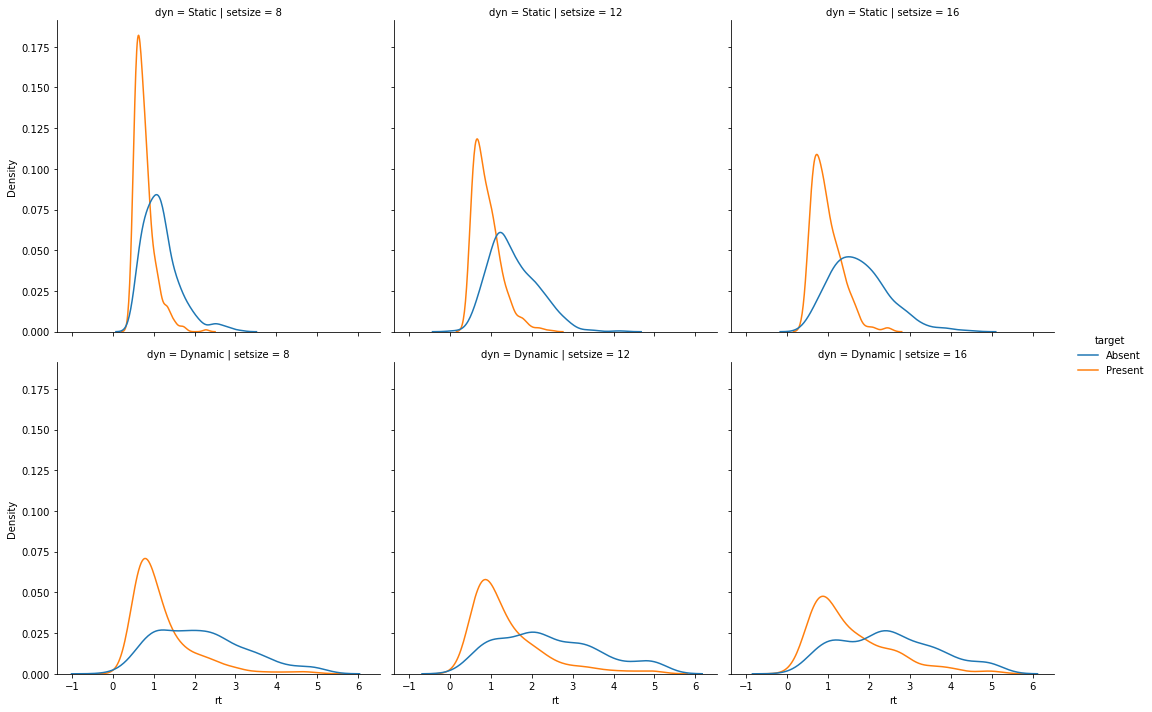

In [18]:
sns.displot(data = dat, kind = 'kde', x = 'rt', hue = 'target' , col = 'setsize', row = 'dyn')

### **Question**: 

What do you see from the data? What would be the next step?




Dealing with outliers and errors
**bold text**
Error rates should be analyzed before discard (here we skip this). Filtering outliers and error trials can be done with `pandas.query()` function. 


In [14]:
vdat = dat.query('rt>0.15 & rt < 4.5 & correct == 1')
print([len(vdat), len(dat)])

[4273, 4620]


## Quick overview of searborn plotting

Seaborn plotting functions can be rougphly divided into three categories: Relational plots, distribution plots, and categorial plots. 

![Searborn Plots](https://seaborn.pydata.org/_images/function_overview_8_0.png)

Common parameters of seaborn functions:

  * `data`: source data
  * `x, y` : x-axis and y-axis
  * `hue`: the column you want to use as separate color
  * `kind`: type of plot you want, such as `line`, `scatter`, `kde`,which depends on your function. 


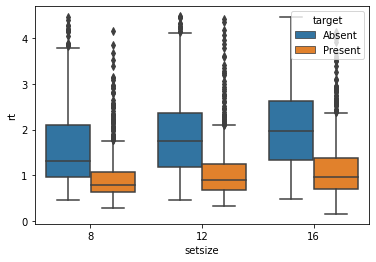

In [19]:
# some examples
sns.boxplot(data = vdat, x = 'setsize', y = 'rt', hue = 'target')

Note the above plot is using concrete function below the categorical level (see above figure). If you want to facet 'dynamic' conditions for multiple subplots, you may need additional `FacetGrid` function, which is a bit more coding. 

Fortunately, you can use the 'Figure' functions. Seaborn plotting functions can be distinguished with Figure-level and axes-level functions. The 'higher' categorical functions, such as `relplot`, `displot`, `catplot` are figure-level functions, include the facet grid already (see above example using `col` and `row` parameters). 


### Mini task

Please separate boxplots for the static and dynamic conditions using the figure-level function `catplot`. 


In [7]:
# you code here. 


### Solution

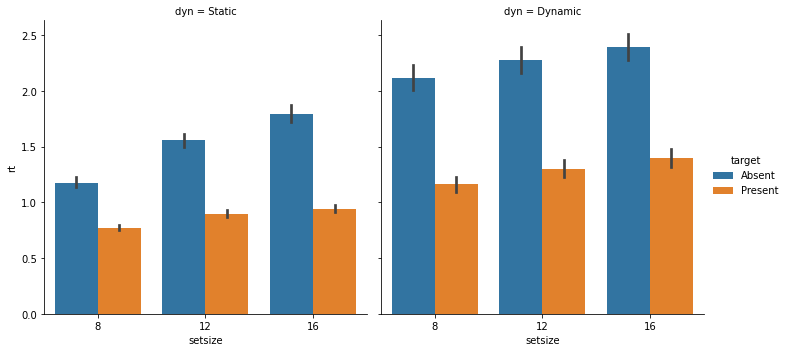

In [23]:
sns.catplot(data = vdat, x = 'setsize', y = 'rt', hue = 'target', col = 'dyn', kind = 'bar')

## Using chain rule to summarize data

For those are familiar with R `tidyverse` way analysis, you can find similar chain verbs in Pandas: 


<table >
  <tr>
    <td><b>dplyr</b></td>
    <td><b>pandas</b></td>
  </tr>
  <tr>
    <td><code>filter()</code> (and <code>slice()</code>)</td>
    <td><code>query()</code> (and <code>loc[]</code>, <code>iloc[]</code>)</td>
  </tr>
  <tr>
    <td><code>arrange()</code></td>
    <td><code>sort_values</code> and <code>sort_index()</code></td>
  </tr>
  <tr>
  <td><code>select() </code>(and <code>rename()</code>)</td>
    <td><code>__getitem__ </code> (and <code>rename()</code>)</td>
  </tr>
  <tr>
  <td><code>distinct()</code></td>
    <td><code>drop_duplicates()</code></td>
  </tr>
  <tr>
    <td><code>mutate()</code> (and <code>transmute()</code>)</td>
    <td>assign</td>
  </tr>
  <tr>
    <td>summarise()</td>
    <td>agg</td>
  </tr>
  <tr>
    <td>sample_n() and sample_frac()</td>
    <td><code>sample</code></td>
  </tr>
  <tr>
    <td><code>%>%</code></td>
    <td><code>pipe</code></td>
  </tr>

</table>


Some of the "missing" verbs in pandas are because there are other, different ways of achieving the same goal. For example `summarise` is spread across `mean`, `std`, etc. It's closest analog is actually the `.agg` method on a `GroupBy` object, as it reduces a DataFrame to a single row (per group). This isn't quite what `.describe` does.



#### Filter rows with  query()




In [24]:
vdat.query("setsize == 12 & sub == 10 & correct == 1")

,target,setsize,dyn,resp,rt,sub,exp,correct
3780,Absent,12,Static,2,2.779448,10,1,1
3783,Absent,12,Static,2,1.218132,10,1,1
...,...,...,...,...,...,...,...,...
4198,Present,12,Dynamic,1,0.794616,10,1,1
4199,Absent,12,Dynamic,2,1.324017,10,1,1


The verbose version:

In [10]:
vdat[(vdat.setsize == 12) & (vdat['sub'] == 10) & (vdat.correct == 1)]
# note: pandas has function pandas.sub. So if you use vdat.sub, pandas will regard it as subtraction function!

,target,setsize,dyn,resp,rt,sub,exp,correct
3780,Absent,12,Static,2,2.779448,10,1,1
3783,Absent,12,Static,2,1.218132,10,1,1
...,...,...,...,...,...,...,...,...
4198,Present,12,Dynamic,1,0.794616,10,1,1
4199,Absent,12,Dynamic,2,1.324017,10,1,1


### Select columns with []

In [25]:
# select(data, subno, Cond, rt) 
vdat[['sub', 'setsize', 'rt']]

,sub,setsize,rt
0,1,12,2.583007
1,1,8,0.935967
...,...,...,...
4618,11,12,0.994617
4619,11,16,1.253425


### Rename

Similar to `.replace()`, `.rename()` function also copies the data and return a new object. So you need to store it in a new object. 

In [26]:
ndata = dat.rename(columns={'dyn': 'Display', 'sub':'NSub'})
ndata.head()

,target,setsize,Display,resp,rt,NSub,exp,correct
0,Absent,12,Static,2,2.583007,1,1,1
1,Absent,8,Static,2,0.935967,1,1,1
2,Present,16,Static,1,0.794771,1,1,1
3,Present,8,Static,1,1.241838,1,1,1
4,Absent,12,Static,2,1.759485,1,1,1


Pandas is more verbose, but the the argument to `columns` can be any mapping. So it's often used with a function to perform a common task, say `df.rename(columns=lambda x: x.replace('-', '_'))` to replace any dashes with underscores. Also, ``rename`` (the pandas version) can be applied to the Index.

In [27]:
# rename 'sub' to 'participant', 'sub' is a function in pandas
vdat = vdat.rename(columns = {'sub':'participant'})
vdat

,target,setsize,dyn,resp,rt,participant,exp,correct
0,Absent,12,Static,2,2.583007,1,1,1
1,Absent,8,Static,2,0.935967,1,1,1
...,...,...,...,...,...,...,...,...
4618,Absent,12,Static,2,0.994617,11,1,1
4619,Absent,16,Static,2,1.253425,11,1,1


### Extract distinct (unique) rows 

In the above explorative data anlysis we have already used this function. 

In [28]:
# distinct(select(data, subno))
dat.setsize.unique()

array([12,  8, 16])

FYI this returns a numpy array instead of a Series.

In [30]:
st = ndata[['setsize','target']].drop_duplicates()

### Add new columns with assign() 

In [38]:
# mutate(ndata,rtms = rt*1000)

ndata.assign(rtms=lambda x: x.rt*1000, 
             nsub = lambda x: x.NSub + 100)

,target,setsize,Display,resp,rt,NSub,exp,correct,rtms,nsub
0,Absent,12,Static,2,2.583007,1,1,1,2583.006817,101
1,Absent,8,Static,2,0.935967,1,1,1,935.967064,101
...,...,...,...,...,...,...,...,...,...,...
4618,Absent,12,Static,2,0.994617,11,1,1,994.616595,111
4619,Absent,16,Static,2,1.253425,11,1,1,1253.424773,111


In [ ]:
# you can also do numpy traditional way
ndata['rtms'] = ndata['rt']*1000
ndata['nsub'] = ndata['sub'] + 100

In [41]:
# if you need to compute two new variables with one depends on the other, you need to chain assign...
ndata.assign(rtms=ndata.rt*1000,
             inv_rt = lambda x: 1/x.rtms)

,target,setsize,Display,resp,rt,NSub,exp,correct,rtms,inv_rt
0,Absent,12,Static,2,2.583007,1,1,1,2583.006817,0.000387
1,Absent,8,Static,2,0.935967,1,1,1,935.967064,0.001068
...,...,...,...,...,...,...,...,...,...,...
4618,Absent,12,Static,2,0.994617,11,1,1,994.616595,0.001005
4619,Absent,16,Static,2,1.253425,11,1,1,1253.424773,0.000798


### Grouped operations 

Pandas uses `.groupby()` function, very much like dplyr::group_by. 

But you need to aware that pandas `.groupby()` will **<font color = 'red'>put grouped variables into multi-index</font>**, so the columns after grouping will not include those grouped variables. If you want to put them back **as columns** for later usage, you need to add **`.reset_index()`**. 

In [42]:
mrt = vdat.groupby(['participant','target','dyn','setsize'])\
    .agg({"resp":"count",
         "rt":"mean"})\
    .rename(columns={"resp":"trials"})
mrt.head()

trials        rt
participant target dyn     setsize                  
1           Absent Dynamic 8            34  2.499295
                           12           33  3.053270
                           16           32  2.898478
                   Static  8            35  1.622023
                           12           35  2.053618

Note, when python chains span over multiple lines, take care the indentation and add one '\' at the previous line. 

I think pandas is more difficult for this particular example.
There isn't as natural a way to mix column-agnostic aggregations (like ``count``) with column-specific aggregations like the other two. You end up writing could like `.agg{'resp': 'count'}` which reads, "I want the count of `resp`", even though you don't care about `resp` specifically. You could just as easily have said `.agg('Cond': 'count')`.
Additionally assigning names can't be done as cleanly in pandas; you have to just follow it up with a ``rename`` like before.

The result is a `MultiIndex` in the columns which can be a bit awkard to work with (you can drop a level with `r.columns.droplevel()`). But `MultiIndex` has its own purpose, such as subsecting data. 

In [44]:
# use 'multi-index' to select subset data
# get out subno of 3.
mrt.loc[3].reset_index()

,target,dyn,setsize,trials,rt
0,Absent,Dynamic,8,35,2.401525
1,Absent,Dynamic,12,34,2.504836
...,...,...,...,...,...
10,Present,Static,12,28,1.005707
11,Present,Static,16,30,1.066554


<font color = 'blue'>

**Note**:

- Pandas use `.loc()` and `.iloc()` to retrieve selected rows. The former uses named index, and the latter uses number index.  
- By default, `data['column_name']` select columns. 

In [45]:
# get subno 3, Target Absent, Display Dynamic, Set size of 8
mrt.loc[(3,'Absent','Dynamic',8)]

trials    35.000000
rt         2.401525
Name: (3, Absent, Dynamic, 8), dtype: float64

But usually we use 'flat' table. We reset_index()

In [46]:
mrt = mrt.reset_index()
mrt

,participant,target,dyn,setsize,trials,rt
0,1,Absent,Dynamic,8,34,2.499295
1,1,Absent,Dynamic,12,33,3.053270
...,...,...,...,...,...,...
130,11,Present,Static,12,35,0.737779
131,11,Present,Static,16,33,0.795092


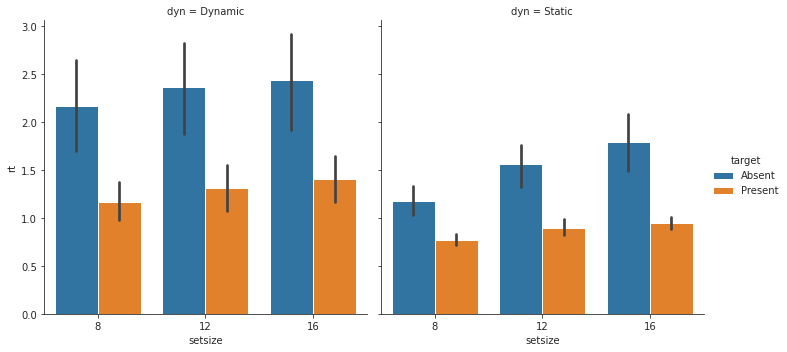

In [47]:
sns.set_style("ticks")

sns.catplot(x ='setsize', y = "rt", hue = "target",  kind = 'bar', col = 'dyn', data=mrt)

## Statistics with Pingouin package

Python has multiple statistical packages, such as `scipy`, `statsmodels` etc. However, non of them provide statistics that we want to report, such as effect size, Bayes factor, post-hoc Bonferroni correction etc. 

The newly devloped package[ `pingouin`](https://pingouin-stats.org/) solves this problem! It gives the essential statistics that we want. In fact, the author of `pingouin`, [Raphael Vallat](https://raphaelvallat.com/), is a French postdoc researcher in the center for human sleep science at UC Berkeley. He knows what we psychologists want!

In [23]:
import pingouin as pg

In a standard psychology study, we often need to test N-way repeated-measures anova. Pingouin use the function `.rm_anova`.

__Note__: At the current version, the repeated-measures ANOVA only support to 2-way ANOVA! Hopefully in near future it supports N-way ANOVA. 

In [51]:
# test static condition, setsize x target
pg.rm_anova(data = mrt.query('dyn == "Static"'), 
            dv = 'rt', 
            within = ['setsize','target'], 
            subject = 'participant', detailed = True)

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,setsize,1.749433,2,20,0.874716,55.448981,6.933797e-09,0.000003,0.847209,0.616328
1,target,6.685902,1,10,6.685902,46.065234,4.816293e-05,0.000048,0.821636,1.000000
2,setsize * target,0.530956,2,20,0.265478,20.490551,1.439950e-05,0.000396,0.672030,0.616363


After a repeated-measures ANOVA, when one factor has more than 3 levels, we need to conduct posthoc comparison, given that the significance of ANOVA main effect does not say which level is significantly different from the others. The post-hoc comparisons often need some adjustments to avoid multiple comparison problems. 

The conservative method is Bonferroni correction, which basically reduces the $p$ by $n$ comparisons to control the maximum family-wise error rate at $\alpha$:

$$P(T_i\text{ passes} | H_0) \le \alpha / n$$.

Often the Bonferroni correction is too conservative (treating all comparisons eaqually). Alternative way is to use Holm's step-down procedure. The basic idea of Holm correction is like this:

1. Ordering the comparison p-values from lowest to highest $p_1, p_2,\cdots, p_n $ and let the associated hypotheses be $H_1, H_2, \cdots, H_n$.
2. Let $k$ be the minimal index such that $p_k > \frac{\alpha}{n + 1 -k}$
3. Reject the null hypotheses  $H_1, H_2, \cdots, H_{k-1}$. If $k=1$ then none of the hypotheses are rejected. 

In [52]:
# post-hoc pair-wise tests
# use the same inputs as rm_anova(), and specify padjust: 'bonf', 'holm', 'fdr_bh' etc.
pg.pairwise_ttests(data = mrt.query('dyn == "Static"'), \
            dv = 'rt',  within = 'setsize', subject = 'participant', padjust = 'bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,setsize,8,12,True,True,-9.067109,10.0,two-sided,0.000004,0.000012,bonf,4878.59,-1.135297
1,setsize,8,16,True,True,-7.764799,10.0,two-sided,0.000015,0.000046,bonf,1466.13,-1.552129
2,setsize,12,16,True,True,-4.477864,10.0,two-sided,0.001183,0.003549,bonf,35.162,-0.483686


### Brief Introduction of Pingouin functions

For a general guidelines, please check [Pingouin official website here](https://pingouin-stats.org/guidelines.html). Here I shamelessly use some of the official illustrations here. 

To determine which function you plan to use, you need to know what test you plan to run. For ANOVA analyses, please look through the following decision tree:

![](https://pingouin-stats.org/_images/flowchart_one_way_ANOVA.svg)

For correlation analysis:

![](https://pingouin-stats.org/_images/flowchart_correlations.svg)



,n,r,CI95%,p-val,BF10,power
pearson,500,-0.010383,"[-0.1, 0.08]",0.816854,0.058,0.056138


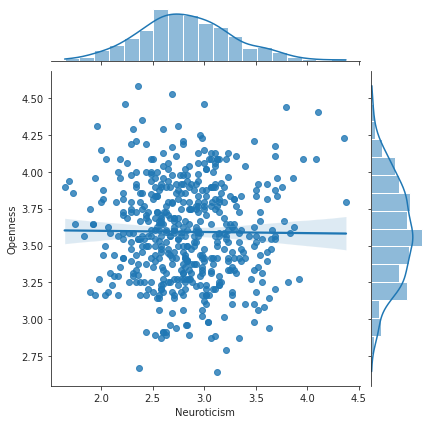

In [53]:
# example from the official website

# Load an example dataset with the personality scores of 500 participants
df = pg.read_dataset('pairwise_corr')

# 1.Test for bivariate normality (optional)
pg.multivariate_normality(df[['Neuroticism', 'Openness']])

# 1bis. Visual inspection with a histogram + scatter plot (optional)
sns.jointplot(data=df, x='Neuroticism', y='Openness', kind='reg')

# 2. If the data have a bivariate normal distribution and no clear outlier(s), we can use a regular Pearson correlation
pg.corr(df['Neuroticism'], df['Openness'], method='pearson')



For non-parametric tests:

![](https://pingouin-stats.org/_images/flowchart_nonparametric.svg)



,Source,ddof1,H,p-unc
Kruskal,Hair color,3,10.58863,0.014172


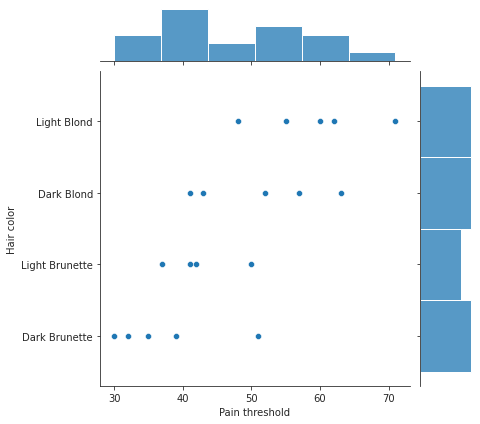

In [54]:
import pingouin as pg

# Load an example dataset comparing pain threshold as a function of hair color
df = pg.read_dataset('anova')

sns.jointplot(data = df, x = 'Pain threshold', y = 'Hair color')

# There are 4 independent groups in our dataset, we'll therefore use the Kruskal-Wallis test:
pg.kruskal(data=df, dv='Pain threshold', between='Hair color')

## Practice

In behavioral analyses, we often want to investigate the trial-wise influences, such as inter-trial effects. In this practice, we do together to find out the target repetition and switch effects.

### Step 1. Lagging column

In order to make the inter-trial analysis possible, we first need to creat a column to denote the condition of the previous trial. This can be done with Python `shift()` function. 

In [55]:
exp2 = pd.read_csv('https://raw.githubusercontent.com/msenselab/dynamic_search/master/data/exp2.csv')
exp2.head()

,target,setsize,dyn,resp,rt,sub,reward,correct
0,Absent,12,Static,2,2.058311,1,Absent,1
1,Present,8,Static,1,0.649519,1,Absent,1
2,Present,16,Static,1,0.599557,1,Absent,1
3,Present,12,Static,1,0.489666,1,Absent,1
4,Absent,12,Static,2,1.898485,1,Absent,1


This raw data does not include the block information, so we only apply shift() function to subject-wise. If you have block information, you should apply shift() to block-wise. That is, the first trial of each block should not have previous trial (i.e., NaN). 

In [57]:
#using chainning rule, groupby() of subject, then apply shift() to add new column (assign)
exp2new = exp2.assign(pre_target = lambda df: df.groupby('sub').target.shift(1))
#check the second participant if shift() works properly
exp2new.query('pre_target != pre_target').head()  # NAN != NAN ;-)

,target,setsize,dyn,resp,rt,sub,reward,correct,pre_target
0,Absent,12,Static,2,2.058311,1,Absent,1,NaN
840,Absent,8,Dynamic,1,3.307285,2,Absent,0,NaN
1680,Present,12,Static,1,0.699432,3,Absent,1,NaN
2520,Absent,8,Static,2,2.607855,4,Absent,1,NaN
3360,Absent,16,Dynamic,2,1.495362,5,Absent,1,NaN


In [58]:
#you can do the matrix way
exp2['pre_target'] = exp2.groupby('sub')['target'].shift(1)
exp2.head()

,target,setsize,dyn,resp,rt,sub,reward,correct,pre_target
0,Absent,12,Static,2,2.058311,1,Absent,1,NaN
1,Present,8,Static,1,0.649519,1,Absent,1,Absent
2,Present,16,Static,1,0.599557,1,Absent,1,Present
3,Present,12,Static,1,0.489666,1,Absent,1,Present
4,Absent,12,Static,2,1.898485,1,Absent,1,Present


### You task

Please add columns of previous setsize, resp. 

In [ ]:
# your code here


### Step 2. calculate average data 

Calucate average data for the combination of current and previous trials.




In [63]:
exp2m = ( exp2new.query('rt > 0.15 & rt < 4.5 & correct == 1 & pre_target == pre_target')  # select valid trials
  .groupby(['sub','setsize','reward','target','pre_target'])   # group by experimental conditions
  .agg({'rt':'mean'}).reset_index()      # averaging 
  .assign(Repetition = lambda df: df.target == df.pre_target) )  # add additional column to indicate inter-trial repetition / switch
exp2m.head()

,sub,setsize,reward,target,pre_target,rt,Repetition
0,1,8,Absent,Absent,Absent,1.642127,True
1,1,8,Absent,Absent,Present,1.880320,False
2,1,8,Absent,Present,Absent,1.089960,False
3,1,8,Absent,Present,Present,1.042328,True
4,1,8,Present,Absent,Absent,1.643384,True


__Note__: in the above chaining, I use `()` to save type in `\` for every line, and it also possible allow me to comment each line

### Pandas data manipulation

Very often we need to rehape pandas table in a long or wide format. Knowing how to reshape table is necessary for further analysis. 

#### 1. wide format to long format with `pivot()`

Function format: 

`.pivot(index = 'id', columns = 'variable', values = 'value')`


In [64]:
exp2w = (exp2m.pivot(index = ['sub','setsize','reward','target'], 
                     columns = 'Repetition', values = 'rt') # spread on Repetition column, not this column is True/False
  .reset_index() #flatten the column names
  .assign(switch_cost = lambda df: df[False] - df[True]))  # note, here the column names from pivot table is a bit unusual, given False and True are NOT string, but logical!
exp2w.head()

Repetition,sub,setsize,reward,target,False,True,switch_cost
0,1,8,Absent,Absent,1.880320,1.642127,0.238192
1,1,8,Absent,Present,1.089960,1.042328,0.047632
2,1,8,Present,Absent,2.104425,1.643384,0.461042
3,1,8,Present,Present,1.152004,1.081655,0.070350
4,1,12,Absent,Absent,1.746325,1.853214,-0.106889


In [65]:
# let's see this unusual column names
exp2w.columns

Index(['sub', 'setsize', 'reward', 'target', False, True, 'switch_cost'], dtype='object', name='Repetition')

### Your task

Please visualize the inter-trial effects and do statistical tests. 

In [ ]:
# your code is here


### Solution

__Tip: Save figures__

Using Matplotlib function `.savefig()` to save the current figure. 

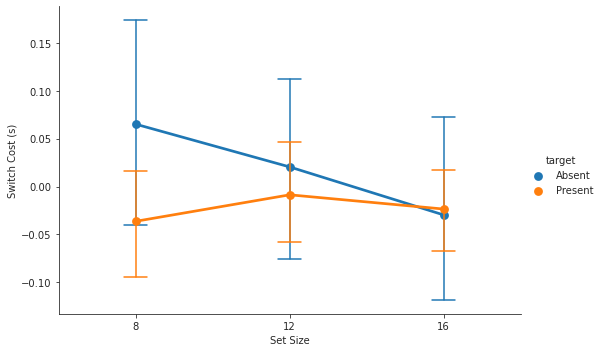

In [66]:
fig = sns.catplot(data = exp2w, kind = 'point', x = 'setsize', y = 'switch_cost', 
                  hue = 'target', errwidth = 1.5, capsize = 0.15, aspect = 1.5) # parameters to adjust error bars
fig.set_xlabels('Set Size')
fig.set_ylabels('Switch Cost (s)')
plt.savefig('ite.pdf')

In [67]:
pg.rm_anova(data = exp2w, 
            dv = 'switch_cost', 
            within = ['setsize','target'],
            subject = 'sub',
            detailed = True)

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,setsize,0.022499,2,22,0.011250,1.137207,0.338854,0.335993,0.093696,0.915555
1,target,0.030956,1,11,0.030956,2.052329,0.179774,0.179774,0.157239,1.000000
2,setsize * target,0.036139,2,22,0.018070,1.375871,0.273518,0.273783,0.111174,0.883475


None of the main factors or interaction was significant. 

## Feedback and suggestions

